<a href="https://colab.research.google.com/github/om1chael/4chan-Website-Scrapper/blob/main/Chapter3_Classificationipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make

#Classification MNIST

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
X, y = mnist["data"], mnist["target"]

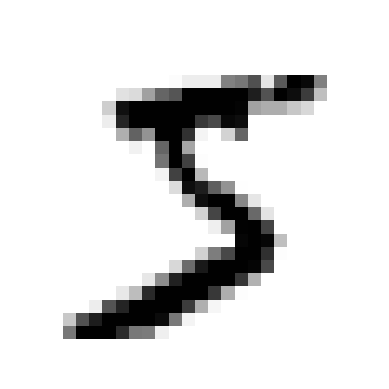

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit = X.iloc[0]
some_digit_image = some_digit.values.reshape(28,28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000],y[60000:]

In [ ]:
# The 5 classifier

# The 5 classifier

In [ ]:
p,c = (y_train == 5,4)

In [ ]:
print(c.shape)

AttributeError: 'int' object has no attribute 'shape'

In [ ]:
y_train_5 = (y_train == "5")
y_test_5 = (y_test == "5")

In [ ]:
y_train_5[0].values

array([False, False, False, ..., False, False, False])

In [ ]:
# Stochastic Gradient Descent

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [ ]:
sgd_clf.predict(some_digit.values.reshape(1,-1))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=4)

for train_index, test_index in skfolds.split(X_train, y_train_5):
  clone_clf = clone(sgd_clf)
  X_train_folds = X_train.values[train_index]
  y_train_folds = y_train_5.values[train_index]
  X_test_fold = X_train.values[test_index]
  y_test_fold = y_train_5[test_index]
  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred = clone_clf.predict(X_test_fold)
  n_correct = sum(y_pred == y_test_fold)
  print(n_correct / len(y_pred))


0.9576666666666667
0.9664
0.9651333333333333
0.9536666666666667


In [ ]:
X_train.values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# Normal implementation


In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3,
scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [ ]:
from sklearn.base import BaseEstimator

In [ ]:
class Never5(BaseEstimator):
  def fit(self, X,y=None):
    pass
  def predict(self,X):
    return np.zeros((len(X),1), dtype=bool)


In [ ]:
never_5_clf = Never5()

In [ ]:
cross_val_score(never_5_clf, X_train,
                y_train_5, cv=3,
                scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [ ]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

# Personal Data project

In [2]:
import numpy as np
import pandas as pd

In [12]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arshid/iris-flower-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/arshid/iris-flower-dataset/versions/1


In [17]:
real_path = "/root/.cache/kagglehub/datasets/arshid/iris-flower-dataset/versions/1/IRIS.csv"
flower_data = pd.read_csv(real_path)

In [19]:
df = pd.DataFrame(flower_data)

In [20]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [54]:
new_mapping = dict(list(enumerate(df["species"].unique())))

In [66]:
new_mapping

{0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}

In [69]:
# Set mapping to {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}
df["species_class"] = df["species"].replace(df["species"].unique(),[0,1,2])
# Show new mapping
df["species_class"].unique()


<ipython-input-69-4a79648572c3>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["species_class"] = df["species"].replace(df["species"].unique(),[0,1,2])


In [76]:
# Drop the old collum
df.drop("species",axis=1,inplace=True)

In [81]:
# Show new colunms
df

,sepal_length,sepal_width,petal_length,petal_width,species_class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Simple Data Analysis

In [84]:
from matplotlib import pyplot as plt

In [108]:
# count samples

a,x,y = df["species_class"].value_counts()

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sepal_length   150 non-null    float64
 1   sepal_width    150 non-null    float64
 2   petal_length   150 non-null    float64
 3   petal_width    150 non-null    float64
 4   species_class  150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


<BarContainer object of 1 artists>

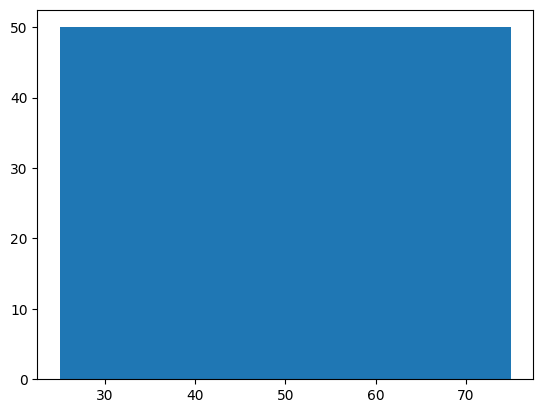

In [113]:
plt.bar(x,y,a)